# Assignment1


Import some tools and functions for further use.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.datasets import make_classification
import itertools

In [3]:
ins = pd.read_csv('./train.csv')

<font size=5> 1.Data preprocessing

a. Since the missing and null data in each column of training set is over 30% or lower than 5%, I choose 15% as the condition. If the proportion of the missing and null data in each column is over 15%, drop the column. If the proportion of the missing and null data in each column is lower than 15%, fill the null and replace the missing data with the mode of each column. The reason of choosing mode is that some values are letters, not numbers.

In [4]:
for column in list(ins.columns[ins.isnull().sum() > 0.15*ins.shape[0]]):
    index = ins.columns
    for i in range(len(index)):
        if column == index[i]:
            ins.drop(ins.columns[i])
# Drop column if the null proportion is over 15%            


In [5]:
for column in list(ins.columns[ins.isnull().sum() > 0]):
    counts = pd.value_counts(ins[column])
    counts = counts.reset_index().values.tolist()
    mode = counts[0][0]
    ins[column].fillna(mode, inplace=True)
# Fill the null with mode if the null proportion is lower than 15% 
    
    

In [6]:
col = ins.shape[1]
row = ins.shape[0]
columns = ins.columns.values.tolist()
for i in range(col):
    column = columns[i]
    missingPro = (ins[column]=="?").sum()/row
    if missingPro > 0.15:
        ins = ins.drop([column],axis = 1)
    elif missingPro > 0:
        counts = pd.value_counts(ins[column])
        counts = counts.reset_index().values.tolist()
        mode = counts[0][0]
        ins[column] = ins[column].replace(to_replace = "?",value = mode)
# Drop column if the missing proportion is over 15%  
# Replace the "?" with mode if the missing proportion is lower than 15% 

C:\Users\86056\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [7]:
Col = ins.shape[1]
columns = ins.columns.values.tolist()
for i in range(Col-1):
    column = columns[i]
    missingPro = (ins[column]=="?").sum()/row
    print(missingPro)
# From the result, the proportion of missing data is 0.

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


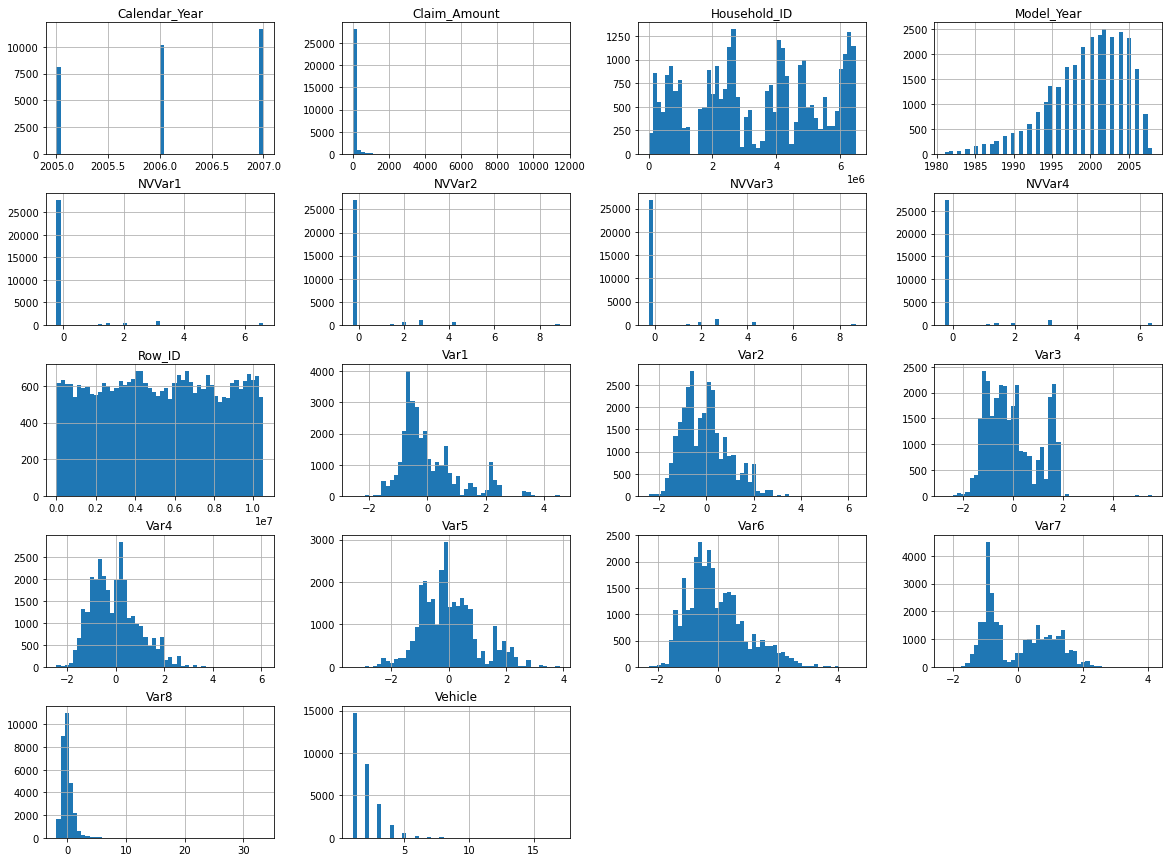

In [9]:
ins[columns].hist(bins=50, figsize=(20,15))
plt.show()

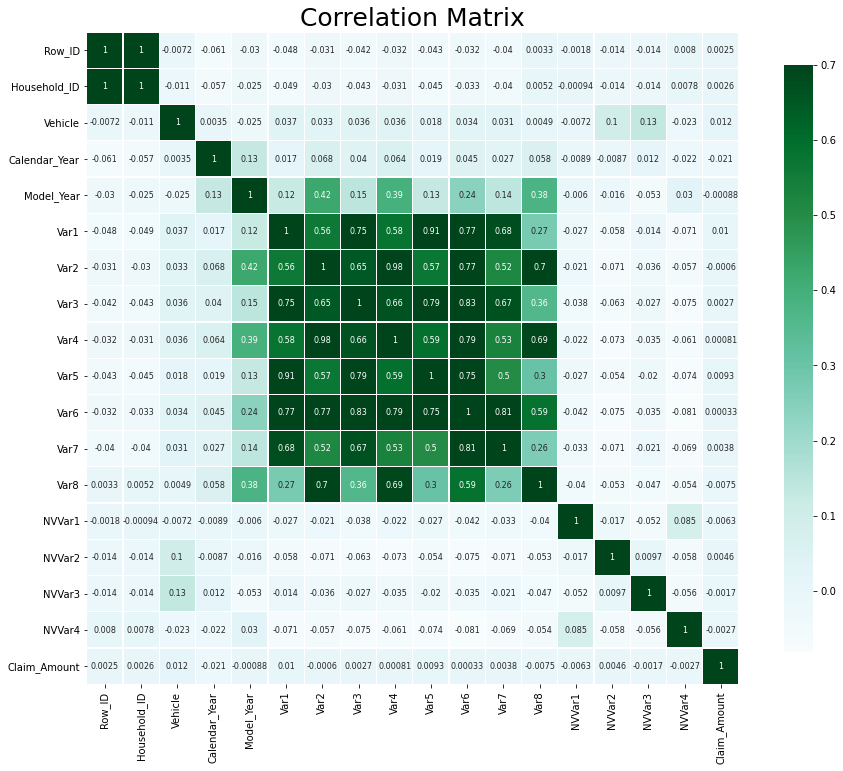

In [12]:
plt.subplots(figsize=(16,12))
plt.title('Correlation Matrix',fontsize=25)
correlation_mat = ins[columns].corr()
sns.heatmap(correlation_mat, linewidths=0.25,vmax=0.7,square=True,cmap="BuGn",
            linecolor='w',annot=True,annot_kws={"size":8},cbar_kws={"shrink": .9})

From the correlation matrxi, it is easily to find that ['Var2, Var4'], ['Var1, Var5'], ['Var3, Var6'], [Var6, Var7] have high Correlation coefficient which are bigger than 0.8. Var1, Var4, Var6 will be dropped.

Some catalogues which have too many kinds of variables should also be dropped.

b. Encoding and transforming.

In [84]:
attributes_cat = ['Calendar_Year','Model_Year','Cat3','Cat9','Cat10','Cat11','NVCat','Cat12']
attributes_num = ['Var1','Var3','Var5','Var7','Var8','NVVar1','NVVar2','NVVar3','NVVar4']

In [85]:
full_transform = ColumnTransformer([
    ("num", StandardScaler(), attributes_num),
    ("cat", OneHotEncoder(), attributes_cat),
])

c. Balance the data. There are 21,000 0 values in "Claim_Amount". To make a balance, I choose to copy 9,000 non-0 values and add another 3,000 copies to make them 50% and 50%.

In [86]:
ins_trans = ins.copy()
copy1 = ins_trans.loc[ins_trans['Claim_Amount']!=0]
copy2 = copy1[0:3000]
ins_trans = ins_trans.append(copy1)
ins_trans = ins_trans.append(copy2)


In [87]:
drop = ['Row_ID','Household_ID','Blind_Make','Blind_Model','Blind_Submodel','Claim_Amount','Var2','Var4','Var6','Cat1','Cat6','Cat8','Vehicle','OrdCat']
#Define the columns that will be droped.

In [88]:
ins_train, ins_val = train_test_split(ins_trans, test_size=0.15, random_state=42)
# Split the dataset as training set and validation set

In [89]:
ins_train_attributes = ins_train.drop(drop,axis = 1)
ins_val_attributes = ins_val.drop(drop,axis = 1)
ins_train_labels = ins_train['Claim_Amount']
ins_val_labels = ins_val['Claim_Amount']
ins_train_attributes_prepared = full_transform.fit_transform(ins_train_attributes)
ins_val_attributes_prepared = full_transform.transform(ins_val_attributes)
#Variables set up.

<font size =5 >2. Performance using a single model

In [13]:
Lin = LinearRegression()
Ri = Ridge()
Ran = RandomForestRegressor()
Gra = GradientBoostingRegressor()

In [14]:
Lin.fit(ins_train_attributes_prepared, ins_train_labels)
Ri.fit(ins_train_attributes_prepared, ins_train_labels)
Ran.fit(ins_train_attributes_prepared, ins_train_labels)
Gra.fit(ins_train_attributes_prepared, ins_train_labels)
# Train the models without grid search

GradientBoostingRegressor()

In [15]:
Lin_error = np.sqrt(mean_squared_error(ins_val_labels, Lin.predict(ins_val_attributes_prepared)))
Ri_error = np.sqrt(mean_squared_error(ins_val_labels, Ri.predict(ins_val_attributes_prepared)))
Ran_error = np.sqrt(mean_squared_error(ins_val_labels, Ran.predict(ins_val_attributes_prepared)))
Gra_error = np.sqrt(mean_squared_error(ins_val_labels, Gra.predict(ins_val_attributes_prepared)))
print("The RMSE of linear regression without grid search is:", Lin_error)
print("The RMSE of ridge regression without grid search is:", Ri_error)
print("The RMSE of random forest regression without grid search is:", Ran_error)
print("The RMSE of gradient boosting regression without grid search is:", Gra_error)  
# The random forest regression model has the best performance.

The RMSE of linear regression without grid search is: 323.717162946008
The RMSE of ridge regression without grid search is: 323.714295946565
The RMSE of random forest regression without grid search is: 196.31168194672793
The RMSE of gradient boosting regression without grid search is: 318.2039872750113


<font size =4>The random forest regression model has the best performance.

In [16]:
#Train the linear regression model with grid search.
#params_Lin = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False]}
#Lin_GS = GridSearchCV(Lin, params_Lin, verbose=1 , scoring = "r2")
#Lin_GS.fit(ins_train_attributes_prepared, ins_train_labels)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    4.0s finished


GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             scoring='r2', verbose=1)

In [68]:
#Lin_GS.best_params_

{'copy_X': True, 'fit_intercept': False, 'normalize': True}

In [17]:
#Train the ridge regression model with grid search.
#params_Ridge = {'alpha': [1,0.1,0.01] , "fit_intercept": [True, False], "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
#Ridge_GS = GridSearchCV(Ri, param_grid=params_Ridge, n_jobs=-1)
#Ridge_GS.fit(ins_train_attributes_prepared, ins_train_labels)

GridSearchCV(estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1, 0.1, 0.01],
                         'fit_intercept': [True, False],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga']})

In [69]:
#Ridge_GS.best_params_

{'alpha': 1, 'fit_intercept': False, 'solver': 'lsqr'}

In [49]:
#Train the random forest regression model with grid search (TAKE A LONG TIME!).
#params_Ran = [
# {'n_estimators': [100, 200, 300], 'max_features': [2, 4, 6], 'n_jobs': [-1]},
# ]
#
#Ran_GS = GridSearchCV(Ran, params_Ran, cv=5,scoring='neg_mean_squared_error',
#                            return_train_score=True)
#Ran_GS.fit(ins_train_attributes_prepared, ins_train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6],
                          'n_estimators': [100, 200, 300], 'n_jobs': [-1]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [70]:
#Ran_GS.best_params_

{'max_features': 2, 'n_estimators': 200, 'n_jobs': -1}

In [50]:
#Train the gradient boosting regression model with grid search (TAKE A LONG TIME!).
#params_Gra = {'n_estimators':[200,300,400],
#                'max_depth':[5,6,7], 'min_samples_leaf':[2,3,4], 'max_features':[6,8,10] }
#Gra_GS = GridSearchCV(estimator=Gra, cv=5, param_grid=params_Gra, n_jobs=-1)
#Gra_GS.fit(ins_train_attributes_prepared, ins_train_labels)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7], 'max_features': [6, 8, 10],
                         'min_samples_leaf': [2, 3, 4],
                         'n_estimators': [200, 300, 400]})

In [71]:
#Gra_GS.best_params_

{'max_depth': 7,
 'max_features': 10,
 'min_samples_leaf': 2,
 'n_estimators': 400}

In [90]:
Lin_bes = LinearRegression(fit_intercept = False,copy_X = True,normalize = True)
Ri_bes = Ridge(solver = 'lsqr',alpha = 1,fit_intercept = False)
Ran_bes = RandomForestRegressor(max_features = 2, n_estimators = 200)
Gra_bes = GradientBoostingRegressor(max_depth = 7, max_features = 10, min_samples_leaf = 2, n_estimators = 400)

In [91]:
# Train the best models with grid search
Lin_bes.fit(ins_train_attributes_prepared, ins_train_labels)
Ri_bes.fit(ins_train_attributes_prepared, ins_train_labels)
Ran_bes.fit(ins_train_attributes_prepared, ins_train_labels)
Gra_bes.fit(ins_train_attributes_prepared, ins_train_labels)

GradientBoostingRegressor(max_depth=7, max_features=10, min_samples_leaf=2,
                          n_estimators=400)

In [92]:
Lin_GS_error = np.sqrt(mean_squared_error(ins_val_labels, Lin_bes.predict(ins_val_attributes_prepared)))
Ridge_GS_error = np.sqrt(mean_squared_error(ins_val_labels, Ri_bes.predict(ins_val_attributes_prepared)))
Ran_GS_error = np.sqrt(mean_squared_error(ins_val_labels, Ran_bes.predict(ins_val_attributes_prepared)))
Gra_GS_error = np.sqrt(mean_squared_error(ins_val_labels, Gra_bes.predict(ins_val_attributes_prepared)))
print("The RMSE of linear regression with grid search is:", Lin_GS_error)
print("The RMSE of ridge regression with grid search is:", Ridge_GS_error)
print("The RMSE of random forest regression with grid search is:", Ran_GS_error)
print("The RMSE of gradient boosting regression with grid search is:", Gra_GS_error) 

The RMSE of linear regression with grid search is: 323.7171623558746
The RMSE of ridge regression with grid search is: 323.66033837665987
The RMSE of random forest regression with grid search is: 171.83370474899917
The RMSE of gradient boosting regression with grid search is: 259.45958670182983


<font size =4>The random forest regression model has the best performance.

<font size = 5>3. Performance using a combination of two models

In [93]:
Bia = ins_trans.copy()
Bia['Claim_Amount'][Bia['Claim_Amount'] > 0] = 1
Bia_train, Bia_val = train_test_split(Bia, test_size=0.15, random_state=42)
Bia_train_attributes = Bia_train.drop(drop,axis = 1)
Bia_val_attributes = Bia_val.drop(drop,axis = 1)
Bia_train_labels = Bia_train['Claim_Amount']
Bia_val_labels = Bia_val['Claim_Amount']
Bia_train_X = full_transform.fit_transform(Bia_train_attributes)
Bia_val_X = full_transform.fit_transform(Bia_val_attributes)
# Classifier variables set up


<ipython-input-93-0510e58f0904>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bia['Claim_Amount'][Bia['Claim_Amount'] > 0] = 1


a. Bianary classifier

In [19]:
clf=RandomForestClassifier(n_estimators=100,n_jobs=-1)
clf.fit(Bia_train_X,Bia_train_labels)
y_pred=clf.predict(Bia_val_X)
# Train the random forest classifier model.

In [20]:
print("The accuracy of random forest classifier model is :",metrics.accuracy_score(Bia_val_labels, y_pred))

The accuracy of random forest classifier model is : 0.8590476190476191


In [21]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(Bia_train_X,Bia_train_labels)
g_pred=GBC.predict(Bia_val_X)
# Train the gradient boosting classifier model.

In [22]:
print("The accuracy of random forest classifier model is :",metrics.accuracy_score(Bia_val_labels, g_pred))

The accuracy of random forest classifier model is : 0.5896825396825397


From above, the accuracy of random forest classifier model is much higher than gradient boosting classifier model.

b. Train the regression model.
Select all rows that the value of Claim_Amount is non-0 from training set in step 2.

In [23]:
pre_X = ins_train.loc[ins['Claim_Amount']!=0]
pre_Y = pre_X['Claim_Amount']
pre_X = pre_X.drop(drop,axis = 1)
pre_X = full_transform.fit_transform(pre_X)
# Use the attributes in non-0 rows in the training set to make sure the data in training and testing set would not overlap.

In [24]:
Ran_pre = RandomForestRegressor()
lin_pre = LinearRegression()
Ri_pre = Ridge()
Gra_pre = GradientBoostingRegressor()

In [25]:
#Train the regression models without grid search
Ran_pre.fit(pre_X, pre_Y)
lin_pre.fit(pre_X, pre_Y)
Ri_pre.fit(pre_X, pre_Y)
Gra_pre.fit(pre_X, pre_Y)

GradientBoostingRegressor()

In [26]:
#Train the linear regression model with grid search.
#params_Lin_1 = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False]}
#Lin_GS_1 = GridSearchCV(lin_pre, params_Lin_1, verbose=1 , scoring = "r2")
#Lin_GS_1.fit(pre_X, pre_Y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    2.3s finished


GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             scoring='r2', verbose=1)

In [54]:
#Lin_GS_1.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': False}

In [27]:
#Train the ridge regression model with grid search.
#params_Ridge_1 = {'alpha': [1,0.1,0.01] , "fit_intercept": [True, False], "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
#Ridge_GS_1 = GridSearchCV(Ri_pre, param_grid=params_Ridge_1, n_jobs=-1)
#Ridge_GS_1.fit(pre_X, pre_Y)

GridSearchCV(estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1, 0.1, 0.01],
                         'fit_intercept': [True, False],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga']})

In [55]:
#Ridge_GS_1.best_params_

{'alpha': 1, 'fit_intercept': False, 'solver': 'lsqr'}

In [45]:
#Train the random forest regression model with grid search (TAKE A LONG TIME!).
#params_Ran_1 = [
# {'n_estimators': [100, 200, 300], 'max_features': [2, 4, 6], 'n_jobs': [-1]},
# ]
#
#Ran_GS_1 = GridSearchCV(Ran_pre, params_Ran_1, cv=5,scoring='neg_mean_squared_error',
#                            return_train_score=True)
#Ran_GS_1.fit(ins_train_attributes_prepared, ins_train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6],
                          'n_estimators': [100, 200, 300], 'n_jobs': [-1]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [57]:
#Ran_GS_1.best_params_

{'max_features': 2, 'n_estimators': 200, 'n_jobs': -1}

In [46]:
#Train the gradient boosting regression model with grid search (TAKE A LONG TIME!).
#params_Gra_1 = {'n_estimators':[200,300,400],
#                'max_depth':[5,6,7], 'min_samples_leaf':[2,3,4], 'max_features':[6,8,10] }
#Gra_GS_1 = GridSearchCV(estimator=Gra_pre, cv=5, param_grid=params_Gra_1, n_jobs=-1)
#Gra_GS_1.fit(pre_X, pre_Y)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7], 'max_features': [6, 8, 10],
                         'min_samples_leaf': [2, 3, 4],
                         'n_estimators': [200, 300, 400]})

In [58]:
#Gra_GS_1.best_params_

{'max_depth': 7,
 'max_features': 10,
 'min_samples_leaf': 2,
 'n_estimators': 400}

In [94]:
lin_best = LinearRegression(fit_intercept = True,copy_X = True,normalize = False)
Ri_best = Ridge(solver = 'lsqr',alpha = 1,fit_intercept = False)
Ran_best = RandomForestRegressor(max_features = 2, n_estimators = 200)
Gra_best = GradientBoostingRegressor(max_depth = 7, max_features = 10, min_samples_leaf = 2, n_estimators = 400)

In [95]:
# Training best models with grid search
Ran_best.fit(pre_X, pre_Y)
lin_best.fit(pre_X, pre_Y)
Ri_best.fit(pre_X, pre_Y)
Gra_best.fit(pre_X, pre_Y)

GradientBoostingRegressor(max_depth=7, max_features=10, min_samples_leaf=2,
                          n_estimators=400)

c. Use tandem model which are random forest classifier and random forest regression

In [28]:
# Classify the 0 values and non-0 values.
l_pre = clf.predict(ins_val_attributes_prepared)

In [29]:
# Calculate the classify accuracy.
ins_val_labels1 = ins_val_labels.copy()
ins_val_labels1[ins_val_labels1 > 0] = 1
metrics.accuracy_score(ins_val_labels1, l_pre)

0.8536507936507937

In [30]:
# Variables setup
index1 = np.where(l_pre>0)
index0 = np.where(l_pre==0)
index1 = list(itertools.chain(*index1))
index0 = list(itertools.chain(*index0))
l_attribute = ins_val_attributes.iloc[index1]
l_label1 = ins_val_labels1.iloc[index1]
l_attribute_prepared = full_transform.transform(l_attribute)

In [31]:
len(index1)

3585

In [96]:
Lin_GS_error_2 = np.sqrt(mean_squared_error(l_label1, lin_best.predict(l_attribute_prepared)))
Ridge_GS_error_2 = np.sqrt(mean_squared_error(l_label1, Ri_best.predict(l_attribute_prepared)))
Ran_GS_error_2 = np.sqrt(mean_squared_error(l_label1, Ran_best.predict(l_attribute_prepared)))
Gra_GS_error_2 = np.sqrt(mean_squared_error(l_label1, Gra_best.predict(l_attribute_prepared)))
print("The RMSE of linear regression with grid search is:", Lin_GS_error_2)
print("The RMSE of ridge regression with grid search is:", Ridge_GS_error_2)
print("The RMSE of random forest regression with grid search is:", Ran_GS_error_2)
print("The RMSE of gradient boosting regression with grid search is:", Gra_GS_error_2)
# Ridge regression has the best performance.

The RMSE of linear regression with grid search is: 189.09089277239704
The RMSE of ridge regression with grid search is: 188.7919061263943
The RMSE of random forest regression with grid search is: 348.31407302578464
The RMSE of gradient boosting regression with grid search is: 313.0532379241631


In [97]:
a = Ri_best.predict(l_attribute_prepared)

In [98]:
# Combine the 0 rows and predicted non-0 rows.
rowl = l_pre.shape[0]
result = np.ndarray(shape=(rowl,1), dtype=float, order='F')
for i in range(len(index0)):
    result[index0[i]] = 0
for j in range(len(index1)):
    result[index1[j]] = a[j]
print("The RMSE of tandem model is:", np.sqrt(mean_squared_error(ins_val_labels, result)))

The RMSE of tandem model is: 318.18990838972667


<font size = 5>4. Report the performance of the best models over the test set

In step2, the random forest regression model has the best performance which has the lowest RMSE.

In step3, the random forest classifier and ridge regression have the best performance which has the lowest RMSE.

In [99]:
print("The RMSE of random forest regression with grid search in step 2 is:", Ran_GS_error)
print("The RMSE of tandem model in step 3 is:", np.sqrt(mean_squared_error(ins_val_labels, result)))

The RMSE of random forest regression with grid search in step 2 is: 171.83370474899917
The RMSE of tandem model in step 3 is: 318.18990838972667


From the results, the random forest regression with grid search in step 2 has better performance.

<font size = 5>5.Present your solution

1.There are 70% values of the Claim_Amount is 0. This causes the dataset imbalanced. I choose to make copies of the rows which the values of Claim_Amount ares non-0 to make a balance.

2.The missing data only exist in categorical variables whose value are letters. They cannot be filled or replaced by the mean or medium of the column. Mode is the optimal option to be the replacement.

3.While doing onehot encoding in training set and testing set, some values of catcategorical variables are not exist in both training and testin set. This would cause the problem of dimension dismatch. Using "transform" instead of "full_transform" would solve this problem.

4.While doing grid search, it may take a long time for random forest regression and gradient boosting regression. In default setting, running the traning line would only call 2 logic processors of the CPU. 'n_drop = -1' can make all logic processors running, which would make the training process much faster.

<font size = 5>6. Function

In [106]:
def my_insurance_claim_predictor(test):
    for column in list(test.columns[test.isnull().sum() > 0.15*test.shape[0]]):
        index = test.columns
        for i in range(len(index)):
            if column == index[i]:
                test.drop(test.columns[i])
                
    for column in list(test.columns[test.isnull().sum() > 0]):
        counts = pd.value_counts(test[column])
        if len(counts) != 0:
            counts = counts.reset_index().values.tolist()
            mode = counts[0][0]
            test[column].fillna(mode, inplace=True)
        
    col = test.shape[1]
    row = test.shape[0]
    columns = test.columns.values.tolist()
   
    
    for i in range(col):
        column = columns[i]
        missingPro = (test[column]=="?").sum()/row
        if missingPro > 0.15:
            test = test.drop([column],axis = 1)
        elif missingPro > 0:
            counts = pd.value_counts(test[column])
            counts = counts.reset_index().values.tolist()
            mode = counts[0][0]
            test[column] = test[column].replace(to_replace = "?",value = mode)
            
    
    test_prepared = full_transform.transform(test)
    test_pre = clf.predict(test_prepared)
    
    index1 = np.where(test_pre>0)
    index0 = np.where(test_pre==0)
    index1 = list(itertools.chain(*index1))
    index0 = list(itertools.chain(*index0))
    test_attribute = test.iloc[index1]
    test_attribute_prepared = full_transform.transform(test_attribute)
    
    non1_pre = Ran_bes.predict(test_attribute_prepared)
    
    rowl = test.shape[0]
    res = np.ndarray(shape=(rowl,1), dtype=float, order='F')
    for i in range(len(index0)):
        res[index0[i]] = 0
    for j in range(len(index1)):
        res[index1[j]] = non1_pre[j]
        
    return res

In [104]:
Xtest = pd.read_csv('./test.csv')


In [109]:
prediction = my_insurance_claim_predictor(Xtest)

C:\Users\86056\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
C:\Users\86056\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "
C:\Users\86056\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "
